**Import all necessary Libraries**

In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**We are practicing Standard Scaler**  
StandardScaler is a part of Feature Scaling a preprocessing step used to normalize or scale the range of independent variables or features of data.
It ensures that no feature dominates others just because of its scale (eg. age vs. income)

In [102]:
#Loading dataset
df=pd.read_csv(r"C:\Users\Anchal\Downloads\Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [103]:
# using iloc we can select rows too 
df=df.iloc[:,-3:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [104]:
df.describe()
#as we can see from this there is a huge gap between age and salary so now lets standardize data

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [105]:
#before scaling lets split data in training and testing it is a good practice
X=df.drop(columns=['Purchased'])
Y=df['Purchased']
x_train, x_test, y_train, y_test = train_test_split(X, Y,  test_size=0.3,
                                                    random_state=0)

x_train.shape,x_test.shape,X.head()

((280, 2),
 (120, 2),
    Age  EstimatedSalary
 0   19            19000
 1   35            20000
 2   26            43000
 3   27            57000
 4   19            76000)

In [106]:
#loading standard Scaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)
x_train_scaled,x_test_scaled


(array([[-1.1631724 , -1.5849703 ],
        [ 2.17018137,  0.93098672],
        [ 0.0133054 ,  1.22017719],
        [ 0.20938504,  1.07558195],
        [ 0.40546467, -0.48604654],
        [-0.28081405, -0.31253226],
        [ 0.99370357, -0.8330751 ],
        [ 0.99370357,  1.8563962 ],
        [ 0.0133054 ,  1.24909623],
        [-0.86905295,  2.26126285],
        [-1.1631724 , -1.5849703 ],
        [ 2.17018137, -0.80415605],
        [-1.35925203, -1.46929411],
        [ 0.40546467,  2.2901819 ],
        [ 0.79762394,  0.75747245],
        [-0.96709276, -0.31253226],
        [ 0.11134522,  0.75747245],
        [-0.96709276,  0.55503912],
        [ 0.30742485,  0.06341534],
        [ 0.69958412, -1.26686079],
        [-0.47689368, -0.0233418 ],
        [-1.7514113 ,  0.3526058 ],
        [-0.67297331,  0.12125343],
        [ 0.40546467,  0.29476771],
        [-0.28081405,  0.06341534],
        [-0.47689368,  2.2901819 ],
        [ 0.20938504,  0.03449629],
        [ 1.28782302,  2.203

In [107]:
#scaling provides us output in array format  but we have to convert it to data frame before using it
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)
x_train_scaled.head(),x_test_scaled.head()

(        Age  EstimatedSalary
 0 -1.163172        -1.584970
 1  2.170181         0.930987
 2  0.013305         1.220177
 3  0.209385         1.075582
 4  0.405465        -0.486047,
         Age  EstimatedSalary
 0 -0.771013         0.497201
 1  0.013305        -0.572804
 2 -0.280814         0.150172
 3 -0.771013         0.265849
 4 -0.280814        -0.572804)

In [108]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [109]:
np.round(x_train_scaled.describe(),1)
#this shows that data is properly scaled as mean is 0 and stdev is 1 but lets understand it better using graphs

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


In [110]:
#lets check the difference and understand the differnce using graph

import matplotlib.pyplot as plt
import seaborn as sns

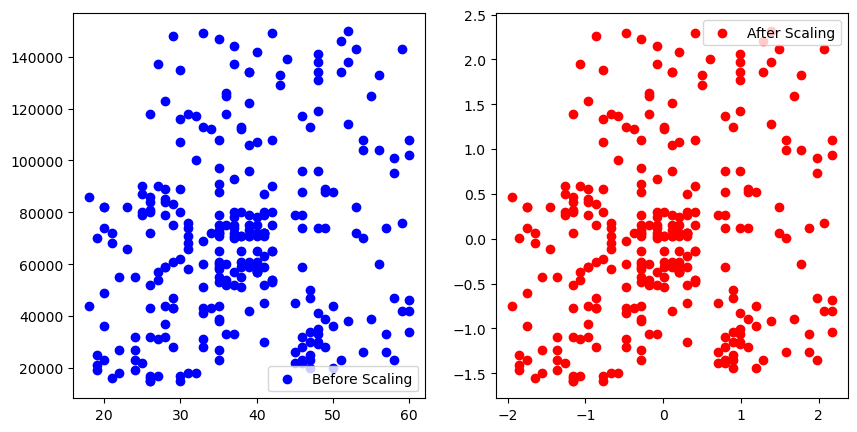

In [111]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x_train['Age'],x_train['EstimatedSalary'],color='blue',label='Before Scaling')
plt.legend()
plt.subplot(1,2,2)
plt.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='red',label='After Scaling')
plt.legend()
plt.show()
#see it did not affects data it just minimize data in a range where comparison is easy and the difference is less
# it is just shifting the data in center(origin) also called mean centering 

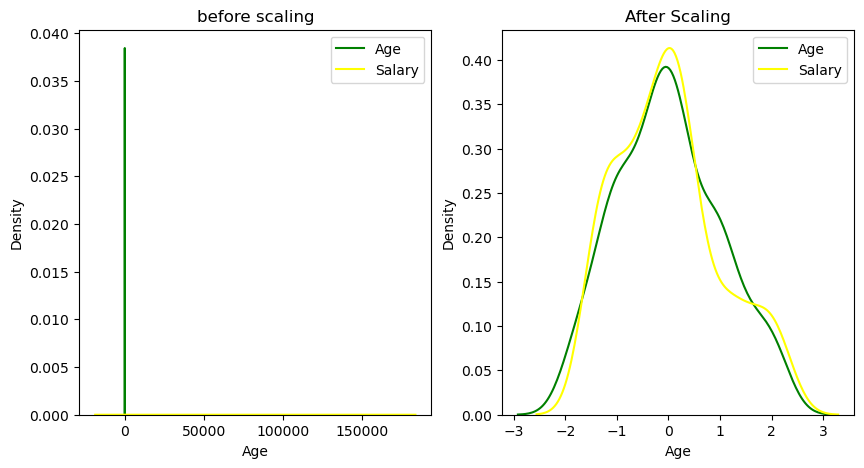

'now this shows that how it will affect as you can see the difference or gap between age and density is so\nhigh that they are almost in a way where one element will dominate the other and due to this model accuracy\nwill decrease \nIn this salary is in high distribution therefore flat and dominating  \nwhile age is less therefore you can see sudden rise on graph \nAs the distributiona are very apart it will greatly affect\nbut not with scaling one \n'

In [112]:
#but now the question arises then what it helped with? to get this answer lets create one more graph
#we plot a pdf(probability density function) for both it helps in better understanding
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.kdeplot(x_train['Age'],color='green',label='Age')
sns.kdeplot(x_train['EstimatedSalary'],color='yellow',label='Salary')
plt.title("before scaling")
plt.legend()
plt.subplot(1,2,2)
sns.kdeplot(x_train_scaled['Age'],color='green',label='Age')
sns.kdeplot(x_train_scaled['EstimatedSalary'],color='yellow',label='Salary')
plt.title("After Scaling")
plt.legend()
plt.show()
'''now this shows that how it will affect as you can see the difference or gap between age and density is so
high that they are almost in a way where one element will dominate the other and due to this model accuracy
will decrease 
In this salary is in high distribution therefore flat and dominating  
while age is less therefore you can see sudden rise on graph 
As the distributiona are very apart it will greatly affect
but not with scaling one 
'''


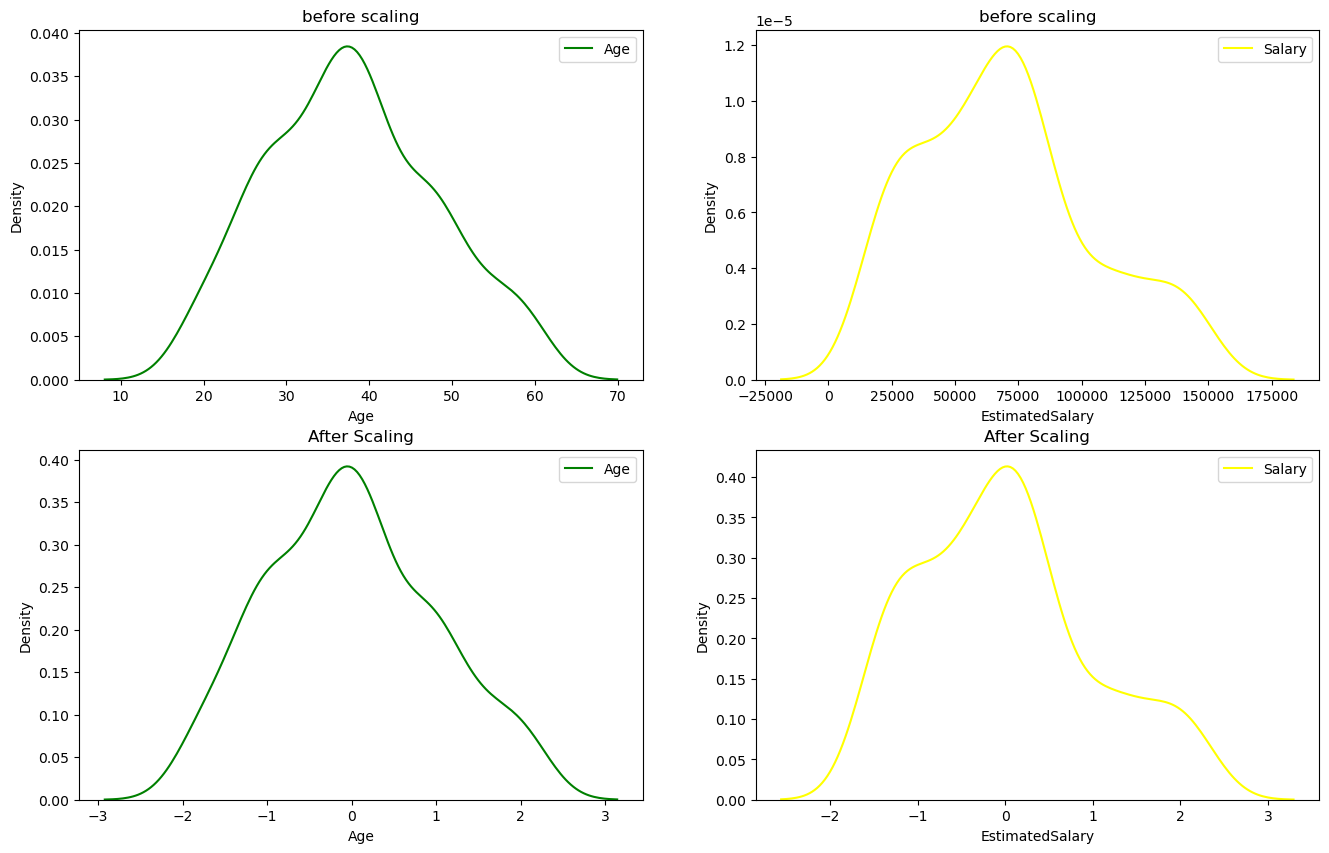

In [113]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.kdeplot(x_train['Age'],color='green',label='Age')
plt.title("before scaling")
plt.legend()
plt.subplot(2,2,2)
sns.kdeplot(x_train['EstimatedSalary'],color='yellow',label='Salary')
plt.title("before scaling")
plt.legend()

plt.subplot(2,2,3)
sns.kdeplot(x_train_scaled['Age'],color='green',label='Age')
plt.title("After Scaling")
plt.legend()
plt.subplot(2,2,4)
sns.kdeplot(x_train_scaled['EstimatedSalary'],color='yellow',label='Salary')
plt.title("After Scaling")
plt.legend()
plt.show()
#this shows it actually doesnot affect the dATA

In [114]:
#Now let see how it impacts model lets take one or two model for performance check 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score

In [115]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [116]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)


LogisticRegression()

In [117]:
y_pred=lr.predict(x_test)
y_pred_scaled=lr_scaled.predict(x_test_scaled)
print("Original data accuracy: ",accuracy_score(y_test,y_pred),"and Scaled Data acuuracy: ",accuracy_score(y_test,y_pred_scaled))
      

Original data accuracy:  0.875 and Scaled Data acuuracy:  0.8666666666666667


In [118]:
from sklearn.tree import DecisionTreeClassifier

In [119]:
dt=DecisionTreeClassifier()
dts=DecisionTreeClassifier()

In [120]:
dt.fit(x_train,y_train)
dts.fit(x_train_scaled,y_train)


DecisionTreeClassifier()

In [121]:
y_pred=dt.predict(x_test)
y_pred_scaled=dt.predict(x_test_scaled)

In [122]:
print("Original data accuracy: ",accuracy_score(y_test,y_pred),"and Scaled Data acuuracy: ",accuracy_score(y_test,y_pred_scaled))
      

Original data accuracy:  0.875 and Scaled Data acuuracy:  0.6583333333333333
